In [1]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk import FreqDist
from nltk.stem import PorterStemmer
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/junggchangho/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junggchangho/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
humanist_vols = pd.read_csv("web_scraped_humanist_listserv.csv")
humanist_vols.head()

,dates,text
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...


In [3]:
humanist_vols['year_start'] = humanist_vols['dates'].str.split('-').str[0]
humanist_vols['year_end'] = humanist_vols['dates'].str.split('-').str[1]
humanist_vols['volume_size'] = humanist_vols['text'].str.count('\n')
humanist_vols = humanist_vols.iloc[:21,:]
humanist_vols

,dates,text,year_start,year_end,volume_size
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1987,1988,50794
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1988,1989,36109
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1989,1990,108695
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,1990,1991,118929
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,1991,1992,81193
5,1992-1993,From: Elaine M Brennan \nSubject: Humanist's B...,1992,1993,59957
6,1993-1994,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....,1993,1994,71763
7,1994-1995,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...,1994,1995,46569
8,1995-1996,"From: ""Gregory Bloomquist"" \nSubject: Round Ta...",1995,1996,61076
9,1996-1997,From: Humanist \nSubject: Humanist begins its ...,1996,1997,52506


In [7]:
#subset_humanist_vols = humanist_vols[0:2]
def stem_words(row):
    stemmed_words = ''
    for token in row.split(' '):
        stemmed_words += porter.stem(token) + ' '
    return stemmed_words
#subset_humanist_vols['stemmed_text'] = subset_humanist_vols.text.apply(stem_words)
humanist_vols['stemmed_text'] = humanist_vols.text.apply(stem_words)
#print(subset_humanist_vols[0:1]['stemmed_text'].values)

In [8]:
stemmed_column = []
#for index, row, in subset_humanist_vols.iterrows():
for index, row, in humanist_vols.iterrows():
    stemmed_words = ''
    for token in row.text.split(' '):
        stemmed_words += porter.stem(token) + ' '
    stemmed_column.append(stemmed_words)

humanist_vols['stemmed_text'] = stemmed_column

In [9]:
def stem_words(row):
    stemmed_words = ''
    for token in row.text.split(' '):
        stemmed_words += porter.stem(token) + ' '
    return stemmed_words
#subset_humanist_vols['stemmed_text'] = subset_humanist_vols.apply(stem_words, axis=1)
humanist_vols['stemmed_text'] = humanist_vols.apply(stem_words, axis=1)

In [22]:
#documents = subset_humanist_vols.text.tolist()
documents = humanist_vols.text.tolist()
vectorizer = TfidfVectorizer(max_df=.7, min_df=1, stop_words=stop_words)

In [23]:
transformed_documents = vectorizer.fit_transform(documents)
transformed_documents_as_array = transformed_documents.toarray()
dates = humanist_vols.dates.tolist()
tfidf_results = []
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    one_doc_as_df['dates'] = dates[counter]
    tfidf_results.append(one_doc_as_df)


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [24]:
tfidf_df = pd.concat(tfidf_results)
tfidf_df = tfidf_df.sort_values(by=['score'], ascending=False)
tfidf_df = tfidf_df[(tfidf_df['term'] != '2002') & (tfidf_df['term'] != '2004') & (tfidf_df['term'] != '2006') & (tfidf_df['term'] != '2007') &(tfidf_df['term'] != '2008')]
tfidf_df.head(10)

,term,score,dates
0,ninch,0.750434,2000-2001
0,utorepas,0.725871,1987-1988
0,ninch,0.632659,1999-2000
1,ninch,0.588579,2001-2002
0,ninch,0.577211,1998-1999
1,ninch,0.563971,2002-2003
1,amico,0.418245,1999-2000
0,ninch,0.349532,1997-1998
0,gopher,0.347021,1993-1994
0,gopher,0.309322,1994-1995


In [25]:
# 1 - Top n unique words
tfidf_df[0:40].term.unique()

array(['ninch', 'utorepas', 'amico', 'gopher', 'doi', 'xxx', 'elra',
       'epas', 'gants', 'ruhc', 'fqs', 'astra', 'saddam', 'vax', 'ippe',
       'ichim99', 'uottawa', 'lemme', 'htm', 'penndrls', '5801',
       'wikipedia', 'dah', 'google', 'qs', '8080'], dtype=object)

In [26]:
tfidf_df['year_start'] = tfidf_df['dates'].str.split('-').str[0]
tfidf_df['year_end'] = tfidf_df['dates'].str.split('-').str[1]

In [31]:
tfidf_df['year_start'] = tfidf_df['year_start'].astype(int)
tfidf_df['year_end'] = tfidf_df['year_end'].astype(int)

In [32]:
tfidf_df.dtypes

term           object
score         float64
dates          object
year_start      int64
year_end        int64
dtype: object

In [36]:
before1996 = tfidf_df[tfidf_df['year_end'] < 1996]
after1996 = tfidf_df[tfidf_df['year_end'] > 1996]

,term,score,dates,year_start,year_end
0,ninch,0.750434,2000-2001,2000,2001
0,ninch,0.632659,1999-2000,1999,2000
1,ninch,0.588579,2001-2002,2001,2002
0,ninch,0.577211,1998-1999,1998,1999
1,ninch,0.563971,2002-2003,2002,2003
...,...,...,...,...,...
40288,liversidge,0.000000,1997-1998,1997,1998
40289,livermore,0.000000,1997-1998,1997,1998
40290,liverani,0.000000,1997-1998,1997,1998
40291,liver,0.000000,1997-1998,1997,1998


In [37]:
#2 top 10 words for text before 1996
before1996[0:40].term.unique()

array(['utorepas', 'gopher', 'astra', 'saddam', 'vax', 'ippe', 'uottawa',
       'lemme', 'penndrls', 'dah', 'qs', 'hussein', 'acadvm1', '441495',
       'brownvm', 'na', 'ugl', 'werman', 'forks', 'celia', 'hypercard',
       'cont', 'iraq', 'missile', 'rahtz', 'idbsu', 'dfl', 'ocp',
       'sanskrit', 'pacling'], dtype=object)

In [38]:
#2 top 10 words for text after 1996
after1996[0:40].term.unique()

array(['ninch', 'amico', 'doi', 'xxx', 'elra', 'gants', 'ruhc', 'fqs',
       'ichim99', 'htm', '5801', 'wikipedia', 'google', 'lachance', 'ecu',
       'xml', 'kis', 'wmccarty', '3dx', 'hforums', 'mccarty_at_kcl',
       'arundel', 'hums'], dtype=object)

In [40]:
#Check frequency for 'wikipedia' by start year
humanist_vols['count'] = humanist_vols['text'].str.lower().str.count('wikipedia')
humanist_vols

,dates,text,year_start,year_end,volume_size,stemmed_text,count
0,1987-1988,From: MCCARTY@UTOREPAS\nSubject: \nDate: 12 Ma...,1987,1988,50794,from: mccarty@utorepas\nsubject: \ndate: 12 ma...,0
1,1988-1989,From: Sebastian Rahtz \nSubject: C++ and Gnu o...,1988,1989,36109,from: sebastian rahtz \nsubject: c++ and gnu o...,0
2,1989-1990,From: Willard McCarty \nSubject: Happy Birthda...,1989,1990,108695,from: willard mccarti \nsubject: happi birthda...,0
3,1990-1991,From: Elaine Brennan & Allen Renear \nSubject:...,1990,1991,118929,from: elain brennan & allen renear \nsubject: ...,0
4,1991-1992,From: Elaine Brennan & Allen Renear \nSubject:...,1991,1992,81193,from: elain brennan & allen renear \nsubject: ...,0
5,1992-1993,From: Elaine M Brennan \nSubject: Humanist's B...,1992,1993,59957,from: elain m brennan \nsubject: humanist' bir...,0
6,1993-1994,From: 6500card%ucsbuxa@hub.ucsb.edu (Cheryl A....,1993,1994,71763,from: 6500card%ucsbuxa@hub.ucsb.edu (cheryl a....,0
7,1994-1995,From: Andrew Burday \nSubject: Re: 7.0638 Qs: ...,1994,1995,46569,from: andrew burday \nsubject: re: 7.0638 qs: ...,0
8,1995-1996,"From: ""Gregory Bloomquist"" \nSubject: Round Ta...",1995,1996,61076,"from: ""gregori bloomquist"" \nsubject: round ta...",0
9,1996-1997,From: Humanist \nSubject: Humanist begins its ...,1996,1997,52506,from: humanist \nsubject: humanist begin it 10...,0


<AxesSubplot:xlabel='year_start'>

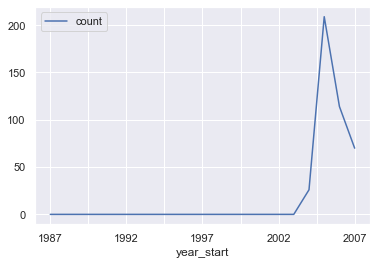

In [41]:
# Plot
humanist_vols.plot(x='year_start', y='count', kind='line')

In [43]:
#3 Now create function that return frequency graph of word by start year
def textword(term):
    humanist_vols['count'] = humanist_vols['text'].str.lower().str.count(term)
    humanist_vols.plot(x='year_start', y='count', kind='line')

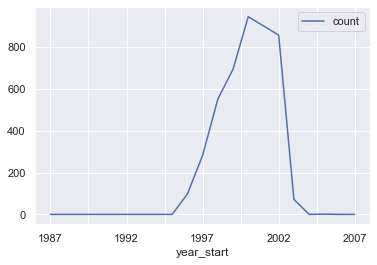

In [44]:
# Check frequency of word 'ninch' by year
textword('ninch')